In [1]:
# Dependendcies
import pandas as pd
import tweepy
import numpy as np
import csv
import unicodecsv

from getWordsDF import getWordsDF as gw # importing the class


import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import re
import warnings

In [2]:
tweets_df = pd.read_csv('HOU_CLEAN_TEXT.csvfinal.csv')

tweets_df.head(1)

,0,9.85162E+17,Sat Apr 14 14:24:33 +0000 2018,nemi chand,RT @cpimspeak: 1st Political Murder of the BJP-IPFT regime has been executed in Shantirbazar Subdivision of South Tripura last night. CPIM̢_,0.1,CPI (M),889,2210,6884,"[-95.893944, 29.39027, -94.943367, 30.236691]",-0.6908,0.2,: st Political Murder of the BJP-IPFT regime has been executed in Shantirbazar Subdivision of South Tripura last night. CPIM̢_
0,1,9.851620e+17,Sat Apr 14 14:24:34 +0000 2018,Jaspreet Sidhu,RT @puchu_insa: #SaintMSG_Initiative85 \nAt @d...,0,Neha Tyagi,9,111,1753,"[-95.893944, 29.39027, -94.943367, 30.236691]",-0.7003,0.0,: At depressed people r encouraged to fight th...


In [3]:
tweets_df.columns = ['Unnamed: 0', 'ID', 'DateTime', 'Username', 'tweet_text2',
       'retweet count', 'Tweet Name', 'followers', 'friends_count',
       'status_count', 'Search Coordinates', 'VADER Score', 'TextBlob Score', 'tweet_text' ]

In [4]:
tweets_df.drop(['Unnamed: 0', 'ID', 'DateTime', 'Username', 'tweet_text2',
       'retweet count', 'Tweet Name', 'followers', 'friends_count',
       'status_count', 'Search Coordinates', 'VADER Score', 'TextBlob Score'], axis = 1, inplace = True)
tweets_df.head(5)

,tweet_text
0,: At depressed people r encouraged to fight th...
1,"Eandi, people r worrying for water?? Farmers g..."
2,: Siddaramaiah ji's home district Mysuru recor...
3,At first didn̢t realize you were referring to ...
4,: Global causes of death in Diarrheal diseases...


In [5]:
tweets_df.columns=['tweet_text']
tweets_df.head(1)

,tweet_text
0,: At depressed people r encouraged to fight th...


In [6]:
tweets_df.tail(5)

,tweet_text
174,I̢m pretty sure I̢m made up of about % coffee....
175,I implore you!! Please find a mental health pr...
176,: Global causes of death in Diarrheal diseases...
177,Can̢t wait to meet all of the new smiling face...
178,: a while ago i was reading that a kid was alw...


In [7]:
#Preprocessing del RT @blablabla:
tweets_df['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets_df['tweet_text'])):
    try:
        tweets_df['tweetos'][i] = tweets_df['tweet_text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets_df['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets_df['tweet_text'])):
    if tweets_df['tweetos'].str.contains('@')[i]  == False:
        tweets_df['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets_df['tweet_text'])):
    tweets_df['tweet_text'][i] = " ".join([word for word in tweets_df['tweet_text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word and 'RT' not in word])


tweets_df['tweet_text'][1]

'Eandi, people r worrying for water?? Farmers get suicide? Is cricket so important?? Ungalaelam serupala adikinumdi'

In [8]:
tweets_df['tweet_text'] = tweets_df['tweet_text'].apply(lambda x: re.sub('[!@#$:).;:,?&/\|]', '', x.lower()))
tweets_df['tweet_text'] = tweets_df['tweet_text'].apply(lambda x: re.sub('  ', ' ', x))
tweets_df['tweet_text'][1]

'eandi people r worrying for water farmers get suicide is cricket so important ungalaelam serupala adikinumdi'

In [9]:
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

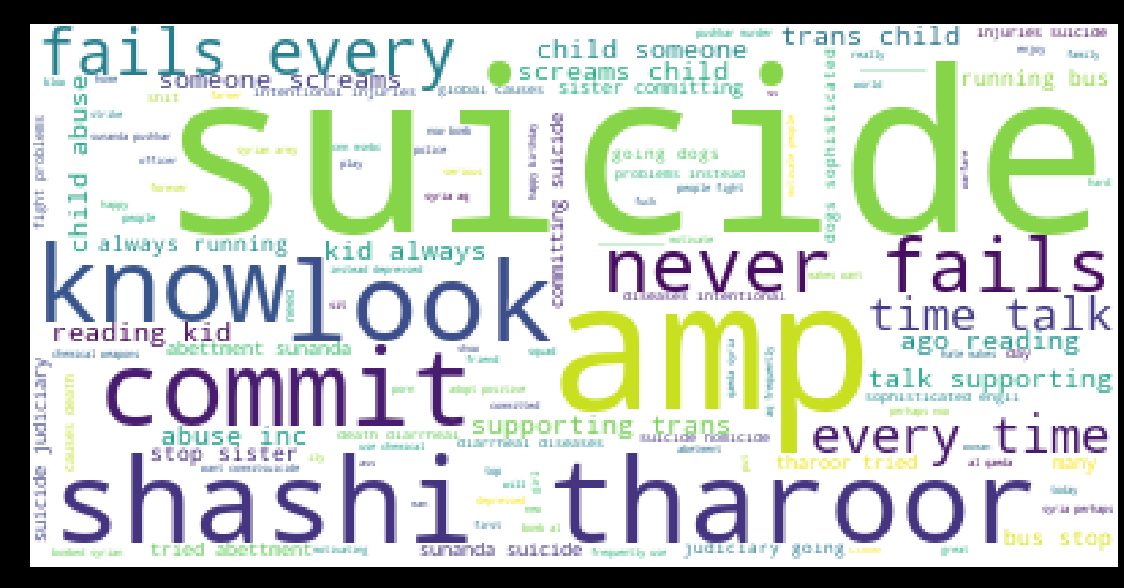

In [10]:
def wordcloud(tweets_df,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets_df[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Distress Tweets")
wordcloud(tweets_df,'tweet_text')  

In [16]:
words_df = gw.getWordsDF(filepath)
words_df.tail()

,phrases
42,I don't care
43,can't imagine living
44,What will heaven be like
45,"You know I love you, right"
46,want to disappear


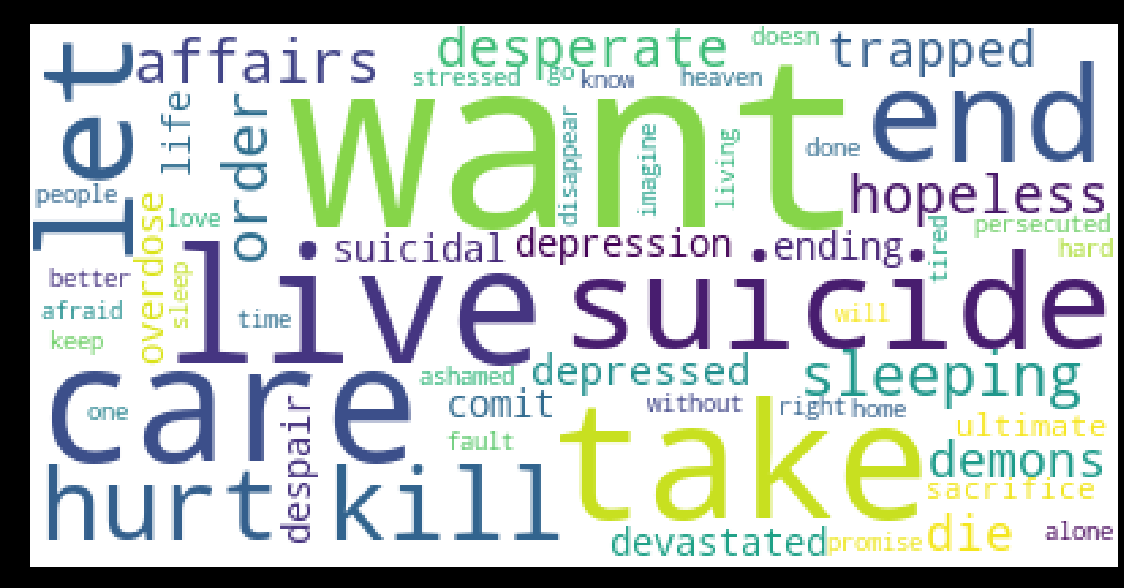

In [17]:
def wordcloud(words_df,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in words_df[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Distress List")
wordcloud(words_df,'phrases')  